In [1]:
%matplotlib inline
# import cv2
from matplotlib import pyplot as plt


## Base radii: Projection Features

In [2]:
import os
import numpy as np
features = list()
targets = list()
eye_data = list()
names = list()
with open(r'D:/code/IrisRepository/research/BaseRadii/ProjectionFeatures6.csv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        data = str(line).strip('\\r\\n')
        data = data.strip('\r')
        data = data.strip('\n')
        data = data.split(',')
        proj_data = list(map(lambda x: int(x), data[4:-2]))
        if len(proj_data) == 640:
            name = data[0]
            cenX, cenY, maxRad = int(data[1]), int(data[2]), int(data[3])
            _eye_data = dict(name=name,x=cenX,y=cenY,maxRad=maxRad)
            eye_data.append(_eye_data)

            features.append(proj_data)
            targets.append([int(data[-2].strip('\r\n')),int(data[-1])])
            names.append([name])
        
print(len(features[0]), targets[0])

640 [54, 128]


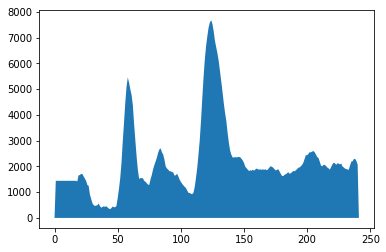

In [3]:
i = 0
# plt.plot(features[i][:240])
plt.gcf().gca().fill(range(242),[0] + features[i][:240]+[0])
# plt.show()
plt.savefig(r'D:\code\IrisRepository\research\BaseRadii\hist.png', bbox_inches='tight')

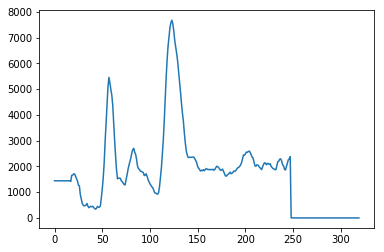

In [4]:
plt.plot(features[i][:320])

In [5]:
f1 = list()
cHist = features[i][:320]
thr = np.median(cHist)
for r in range(len(cHist)):
    if cHist[r] > thr:
        for j in range(cHist[r]//50):
            f1.append(r)
f2 = list()
cHist = features[i][320:]
thr = np.median(cHist)
for r in range(len(cHist)):
    if cHist[r] > thr:
        for j in range(cHist[r]//50):
            f2.append(r)


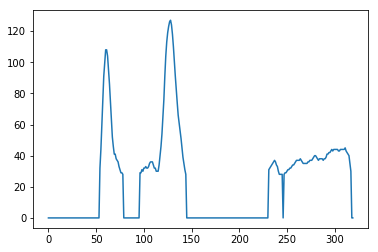

In [22]:
res = np.histogram(f2, range=[0,320], bins=320)[0]
plt.plot(res)

In [7]:
targets[i]

[54, 128]

In [27]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='spherical')

In [28]:
model.fit(np.array(f1 + f2).reshape(-1,1))

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=3, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [29]:
model.weights_

array([ 0.1282621,  0.6538501,  0.2178878])

In [30]:
model.means_

array([[ 216.44574819],
       [ 112.6102039 ],
       [ 270.43655278]])

In [183]:
model.covariances_

array([   80.57837595,  1570.89284556,   856.71196066])

In [190]:
r = np.delete(model.means_, np.argmax(model.covariances_))

In [191]:
r

array([ 129.65995559,   71.32498986])

In [9]:
X = np.array(features)
y = np.array(targets)

In [195]:
a = np.array([10,1,2])
print sorted(np.delete(a,2))

[1, 10]


None


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [62]:
from sklearn.linear_model import MultiTaskElasticNet

In [ ]:
model = MultiTaskElasticNet(alpha=0.1, max_iter=1e4)
model.fit(X_train, y_train)


In [207]:
def get_selection(feature):
    f1 = list()
    cHist = feature[:320]
    thr = np.median(cHist)
    for r in range(len(cHist)):
        if cHist[r] > thr:
            for j in range(cHist[r]//50):
                f1.append(r)
    f2 = list()
    cHist = feature[320:]
    thr = np.median(cHist)
    for r in range(len(cHist)):
        if cHist[r] > thr:
            for j in range(cHist[r]//50):
                f2.append(r)
    return np.array(f1).reshape(-1,1)

In [208]:
def predictRadiiEM(features):
    model = GaussianMixture(n_components=3, covariance_type='spherical', weights_init=[0.3,0.3,0.4])
    answers = list()
    for f in features:
        model.fit(get_selection(f))
        miss = np.argmax(model.covariances_)
        r = np.delete(model.means_, np.argmax(model.covariances_))
        answers.append(sorted(r))
    return answers

In [200]:
def score_prediction(targets, answers):
    

IndentationError: expected an indented block (<ipython-input-200-e853e6497bd9>, line 2)

In [204]:
preds = predictRadiiEM(features[:10])

In [205]:
preds

[[71.348488018651125, 129.67050812949236],
 [168.77413233740737, 293.10678882726802],
 [45.506443458486139, 121.61581640892855],
 [59.062167330979818, 123.98387487675724],
 [66.532126100773013, 124.66943917652883],
 [64.814648857882915, 151.22678986112723],
 [136.73269351654034, 223.33821249826522],
 [136.00887940467013, 246.35831563335111],
 [46.70167388254584, 285.29000108703804],
 [41.863105016915021, 104.69946478136937]]

In [209]:
predictRadiiEM(features[:10])

[[130.02405321391493, 217.29644079886529],
 [80.01034626397805, 291.7214652511326],
 [43.00680247012572, 123.92311844740905],
 [61.533234844540999, 128.41892563198476],
 [131.22313840703657, 229.4596252460409],
 [61.849144524570292, 141.02176384417567],
 [132.31104482846223, 191.77349214298312],
 [137.40384269967922, 231.42880192687068],
 [12.964922082076898, 54.648900988493139],
 [108.01817296047146, 221.38668812692779]]

In [206]:
targets[:10]

[[54, 128],
 [57, 118],
 [50, 123],
 [55, 127],
 [53, 123],
 [58, 137],
 [59, 131],
 [54, 126],
 [43, 129],
 [32, 112]]